In [1]:
%cd "C:\Users\Owner\Documents\Documents\GT\CDA\HW1\Graves_Chris_HW1"

C:\Users\Owner\Documents\Documents\GT\CDA\HW1\Graves_Chris_HW1


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import collections
import time

In [3]:
def readandcolor(filepath):
    og = cv2.imread(filepath)
    img = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
    return img

In [4]:
football = readandcolor("football.bmp")
beach = readandcolor("beach.bmp")
seven = readandcolor("711.png")

## Original Images

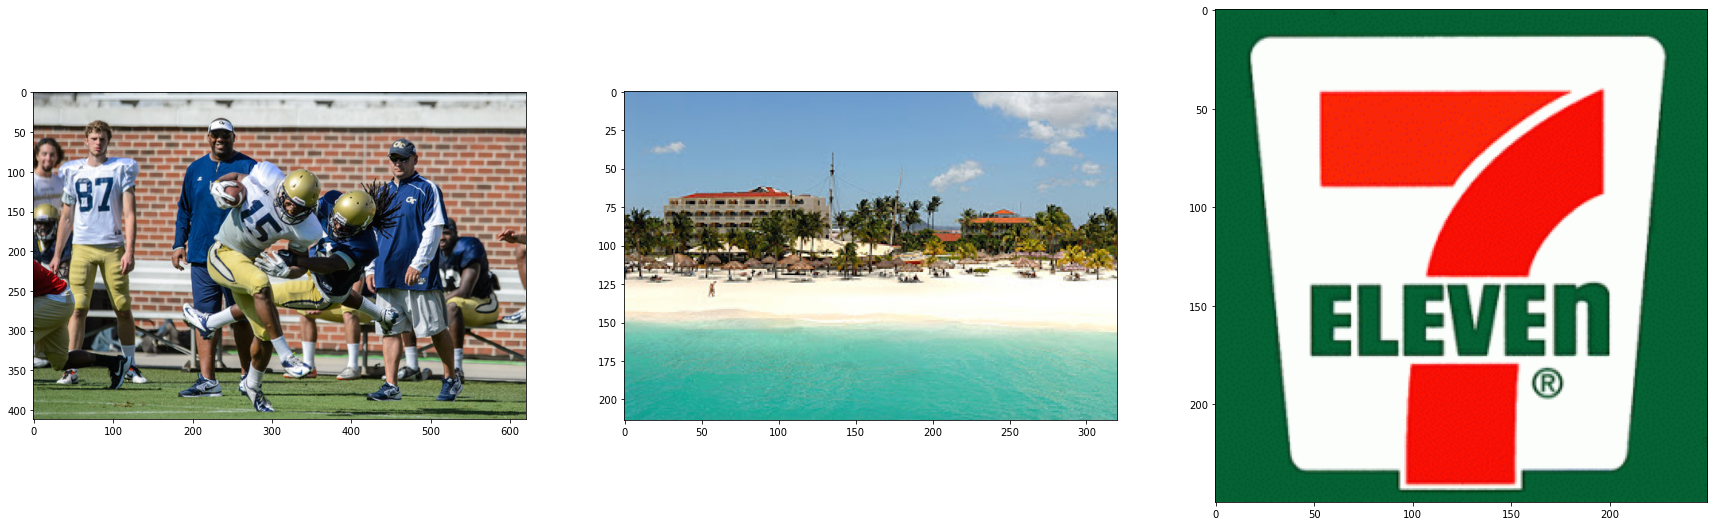

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30,15))
ax[0].imshow(football)
ax[1].imshow(beach)
ax[2].imshow(seven)

In [6]:
def preprocess(img):
    vector = img.reshape((-1,3))
    vectorized = np.float32(vector)
    return vectorized

In [7]:
footballvec = preprocess(football)
beachvec = preprocess(beach)
sevenvec = preprocess(seven)

## K Means Algorithm

In [8]:
def kmeans2(pixels, k):
    start_time = time.time()
    uniques = np.unique(pixels, axis = 0)
    if len(uniques) < k: 
            k = len(uniques)
    samples = np.random.choice(range(0, len(uniques)), size = k)
    centroids = uniques[samples]
    if len(centroids) < k:
        k = len(centroids)
    done = False
    iteration = 0
    labels = np.zeros(len(pixels))
    while done == False:
        for ind, pixel in enumerate(pixels):
            distances = np.linalg.norm(pixel - centroids, axis = 1)
            labels[ind] = np.argmin(distances, axis = 0)
        if len(np.unique(labels)) < k:
            k += -1
            centroids = centroids[:-1]
            print(f"only {len(np.unique(labels))} clusters, k reduced to {k}, new centroids: {centroids}")
            continue
        old_centroids = np.array(centroids)
        done = True
        for c in range(0, k):
            centroids[c] = np.rint(np.mean(pixels[labels == c], axis = 0))
        for c in range(0, k):
            moved = abs(np.sum((centroids[c] - old_centroids[c]) / old_centroids[c]))
            if moved > .0001:
                done = False
        iteration += 1
    classes = np.array(labels)
    seconds = time.time() - start_time
    print(f"{k} Clusters converged in {iteration} iterations taking {seconds} seconds.")
    return classes, centroids

In [9]:
def compressed(classes, centroids):
    res = [centroids[x] for x in classes.astype(int)]
    res = np.array(res).astype(int)
    return res

In [10]:
def compressedimage(vector, img):
    return vector.reshape(img.shape)

In [11]:
def fullcompress(img, k):
    lab, cent = kmeans2(preprocess(img), k)
    result_image = compressedimage(compressed(lab, cent), img)
    return result_image

## Compressing Images

**The below show the results of the clustering for each image for 2, 4, 8 , and 16 clusters.
In the instance that there is a line that says "only X clusters, k reduced to y"--that means the algorithm had an empty clusters, so reduced k and reinitialized the algorithm.**

**We see that, due to the vectorization of the code, the time to run is roughly linear, on a per-iteration basis.**

(Note: the first 4 entries are for the football picture (column 1 of pictures below), the next four for the beach picture (column 2 of pictures below), and finally the last 4 for my seven eleven picture (column 3 of pictures below).)

In [12]:
footballk2 = fullcompress(football, 2)
footballk4 = fullcompress(football, 4)
footballk8 = fullcompress(football, 8)
footballk16 = fullcompress(football, 16)
beachk2 = fullcompress(beach, 2)
beachk4 = fullcompress(beach, 4)
beachk8 = fullcompress(beach, 8)
beachk16 = fullcompress(beach, 16)
sevenk2 = fullcompress(seven, 2)
sevenk4 = fullcompress(seven, 4)
sevenk8 = fullcompress(seven, 8)
sevenk16 = fullcompress(seven, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


2 Clusters converged in 17 iterations taking 78.30473971366882 seconds.
4 Clusters converged in 14 iterations taking 64.25839710235596 seconds.
8 Clusters converged in 35 iterations taking 181.86932587623596 seconds.
16 Clusters converged in 47 iterations taking 234.7938368320465 seconds.
2 Clusters converged in 4 iterations taking 4.805254697799683 seconds.
4 Clusters converged in 14 iterations taking 16.414562702178955 seconds.
8 Clusters converged in 21 iterations taking 25.013602018356323 seconds.
16 Clusters converged in 30 iterations taking 36.37065100669861 seconds.
2 Clusters converged in 3 iterations taking 3.543962001800537 seconds.
4 Clusters converged in 9 iterations taking 10.053237676620483 seconds.
only 7 clusters, k reduced to 7, new centroids: [[252. 220. 220.]
 [156. 166. 156.]
 [ 65. 110.  85.]
 [ 20.  46.  22.]
 [180. 202. 199.]
 [ 65. 110.  85.]
 [ 50. 108.  79.]]
only 6 clusters, k reduced to 6, new centroids: [[252. 220. 220.]
 [156. 166. 156.]
 [ 65. 110.  85.]


**Below we see the results of the compressions, with the originals at the top, followed by the 2, 4, 8, and 16 cluster compressions.**

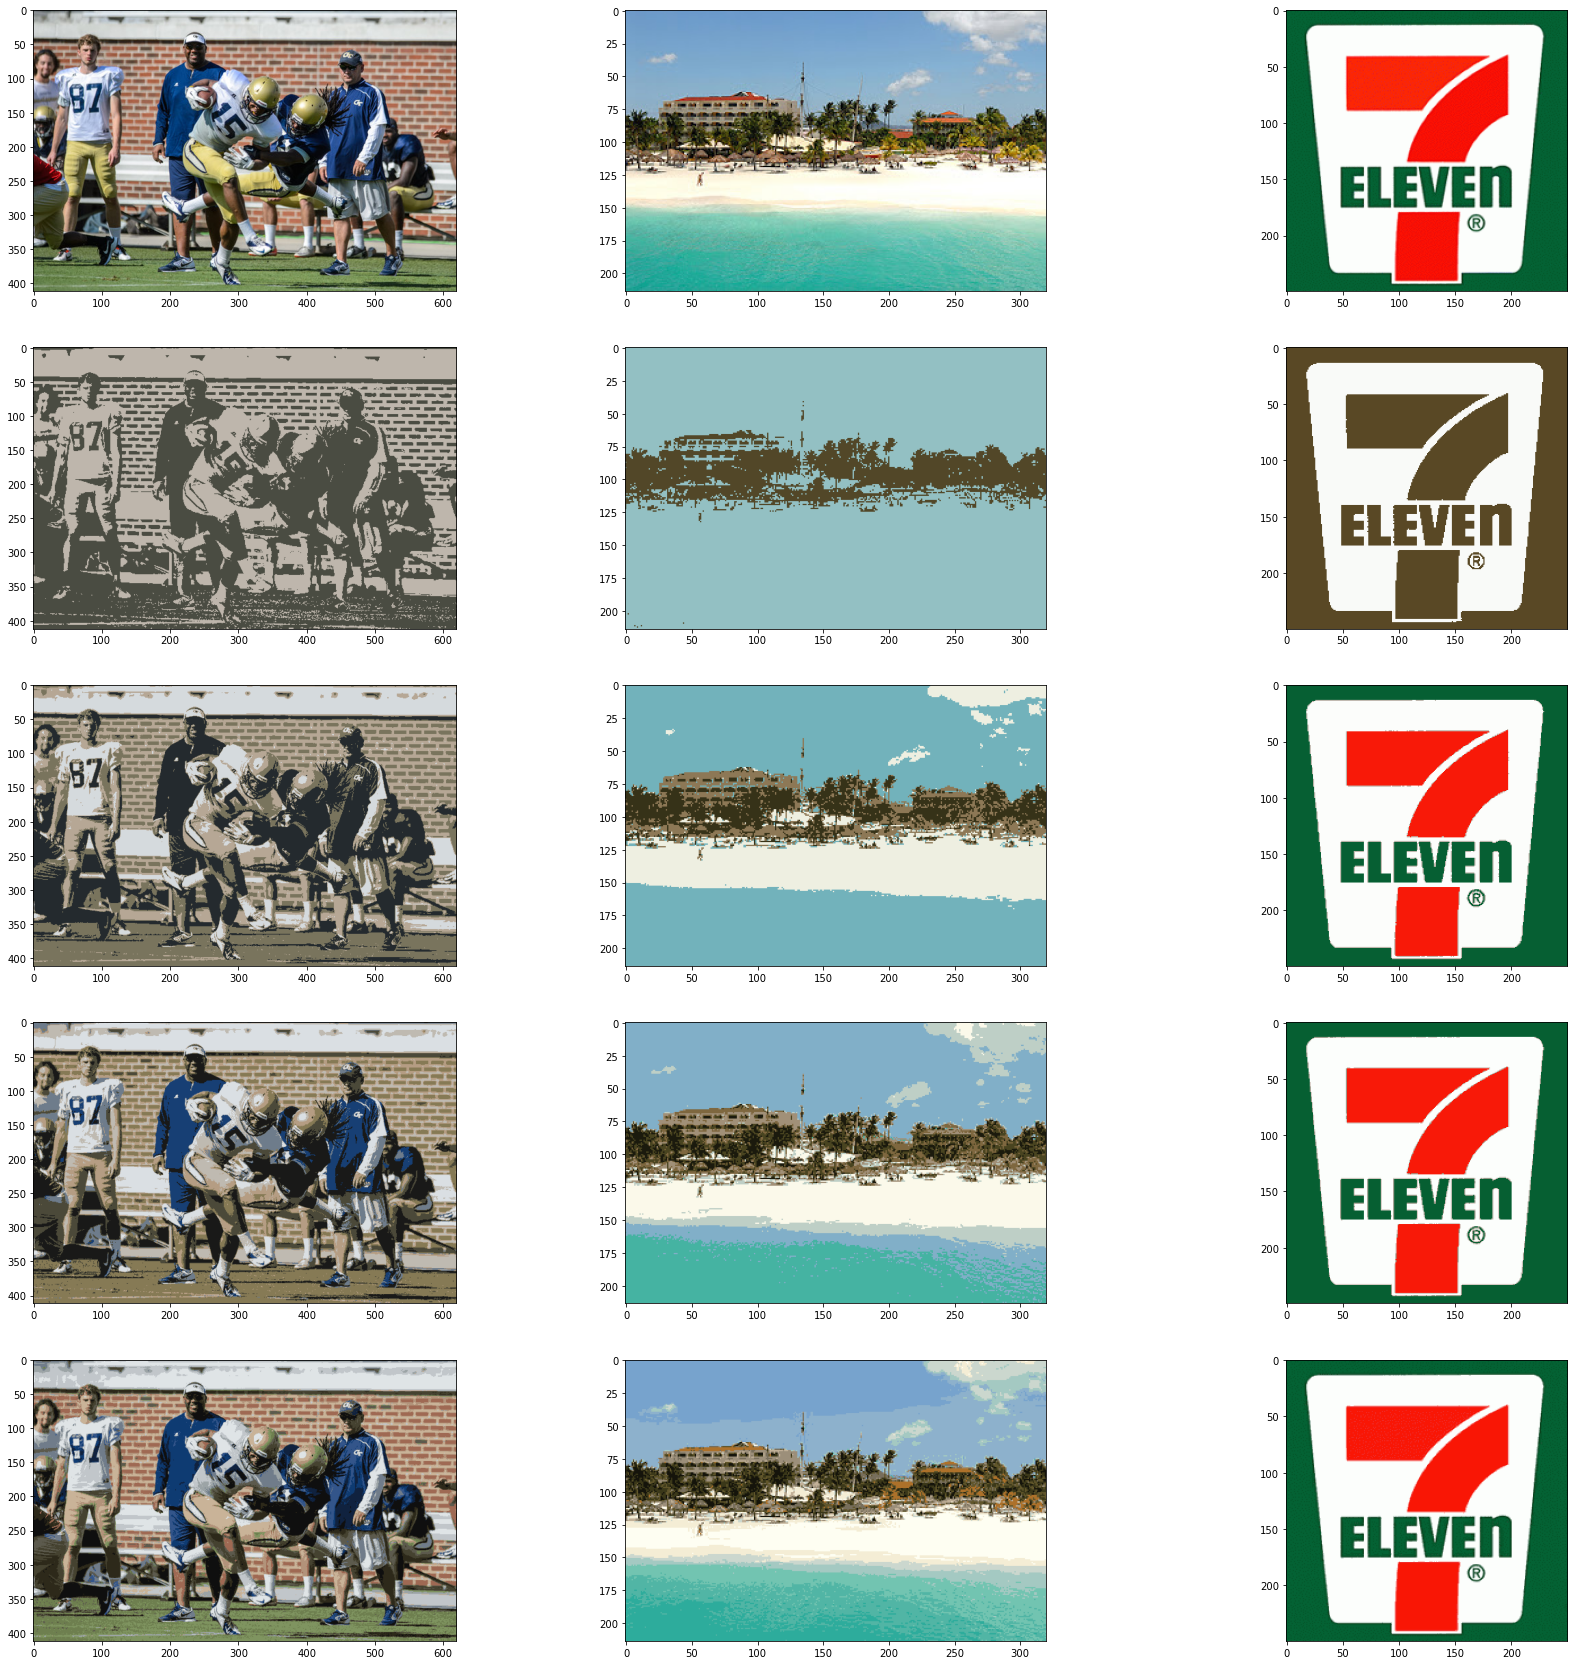

In [13]:
fig, ax = plt.subplots(5,3, figsize=(30,30))
ax[0, 0].imshow(football)
ax[1, 0].imshow(footballk2)
ax[2, 0].imshow(footballk4)
ax[3, 0].imshow(footballk8)
ax[4, 0].imshow(footballk16)
ax[0, 1].imshow(beach)
ax[1, 1].imshow(beachk2)
ax[2, 1].imshow(beachk4)
ax[3, 1].imshow(beachk8)
ax[4, 1].imshow(beachk16)
ax[0, 2].imshow(seven)
ax[1, 2].imshow(sevenk2)
ax[2, 2].imshow(sevenk4)
ax[3, 2].imshow(sevenk8)
ax[4, 2].imshow(sevenk16)

In [14]:
def kmeans3(pixels, k, centroids):
    start_time = time.time()
    if len(centroids) < k:
        k = len(centroids)
    done = False
    iteration = 0
    labels = np.zeros(len(pixels))
    while done == False:
        for ind, pixel in enumerate(pixels):
            distances = np.linalg.norm(pixel - centroids, axis = 1)
            labels[ind] = np.argmin(distances, axis = 0)
        if len(np.unique(labels)) < k:
            k += -1
            centroids = centroids[:-1]
            print(f"only {len(np.unique(labels))} clusters, k reduced to {k}, new centroids: {centroids}")
            continue
        old_centroids = np.array(centroids)
        done = True
        for c in range(0, k):
            centroids[c] = np.rint(np.mean(pixels[labels == c], axis = 0))
        for c in range(0, k):
            moved = abs(np.sum((centroids[c] - old_centroids[c]) / old_centroids[c]))
            if moved > .0001:
                done = False
        iteration += 1
    classes = np.array(labels)
    seconds = time.time() - start_time
    print(f"{k} Clusters converged in {iteration} iterations taking {seconds} seconds.")
    return classes, centroids

In [15]:
def fullcompress2(img, k, cents):
    lab, cent = kmeans3(preprocess(img), k, cents)
    result_image = compressedimage(compressed(lab, cent), img)
    return result_image

## Bad Centroids

**Below we investigate 3 bad centroid groups. First, we do 5 centroids that are all right next to each other.
We see that in this case, the algorithm actually worked okay, resulting in the desired 5 clusters.**

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


5 Clusters converged in 35 iterations taking 44.69224190711975 seconds.


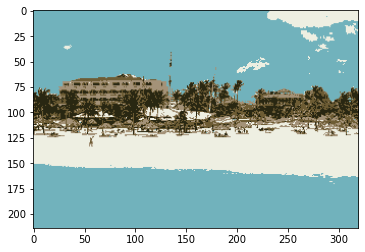

In [16]:
badcentroids1 = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4], [5,5,5]])

badbeach1 = fullcompress2(beach, 5, badcentroids1)
plt.figure()
plt.imshow(badbeach1) 
plt.show()

**In the next case, we intialize duplicate clusters, Obviously, in this case we have empty clusters, and the algorithm keeps stepping down through values for k until it gets to a value it can fulfill (1, in this case).**

only 1 clusters, k reduced to 4, new centroids: [[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
only 1 clusters, k reduced to 3, new centroids: [[1 1 1]
 [1 1 1]
 [1 1 1]]
only 1 clusters, k reduced to 2, new centroids: [[1 1 1]
 [1 1 1]]
only 1 clusters, k reduced to 1, new centroids: [[1 1 1]]
1 Clusters converged in 2 iterations taking 7.748536586761475 seconds.


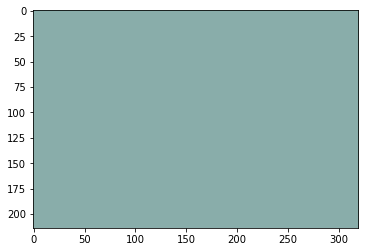

In [17]:
badcentroids2 = np.array([[1,1,1], [1,1,1], [1,1,1], [1,1,1], [1,1,1]])
badbeach2 = fullcompress2(beach, 5, badcentroids2)
plt.imshow(badbeach2) 
plt.show()

**Finally, we try clusters that are very far apart from each other, in extreme locations on the image, These provide mixed results--since some are so far away form the center of the spectrum, they result in empty clusters, so K is decreased accordingly. In this case, we went from 5 to 3 clusters.**

only 3 clusters, k reduced to 4, new centroids: [[  1   1   1]
 [250 250 250]
 [125 125 125]
 [  0 250   0]]
only 3 clusters, k reduced to 3, new centroids: [[  1   1   1]
 [250 250 250]
 [125 125 125]]
3 Clusters converged in 7 iterations taking 11.488147258758545 seconds.


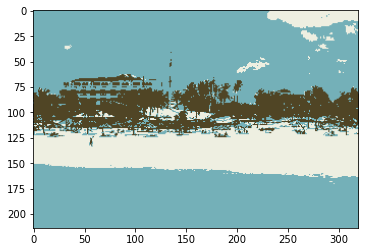

In [18]:
badcentroids3 = np.array([[1,1,1], [250,250,250], [125,125,125], [0,250,0], [250,1,250]])
badbeach3 = fullcompress2(beach, 5, badcentroids3)
plt.imshow(badbeach3) 
plt.show()


**Of course, in all situations, if we happen to pick cluster centroids that are far away from where they will eventually end up, then our algorithm will take more iterations to converge. Likewise, if we get lucky and get the centroids almost-right, then we will converge quickly.**